<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/5466790/pexels-photo-5466790.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>Getting Started </span></b> </div>

<div style="color:white;
            display:fill;
            border-radius:85px;
            background-color:orange;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:2px">
    <h3 style='padding: 25px;
              color:white;
              text-align:center;'>
        IMPORTING LIBRARIES
    </h3>
    </div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

<div style="color:white;
            display:fill;
            border-radius:85px;
            background-color:orange;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        IMPORT DATA
    </h3>
    </div>

In [2]:
df = pd.read_csv("/kaggle/input/jobs-in-data/jobs_in_data.csv")
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


# <span style="color:#E888BB; font-size: 1%;">1 | EXPLORATORY DATA ANALYSIS</span>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://images.pexels.com/photos/5466790/pexels-photo-5466790.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> EXPLORATORY DATA ANALYSIS </span></b> </div>

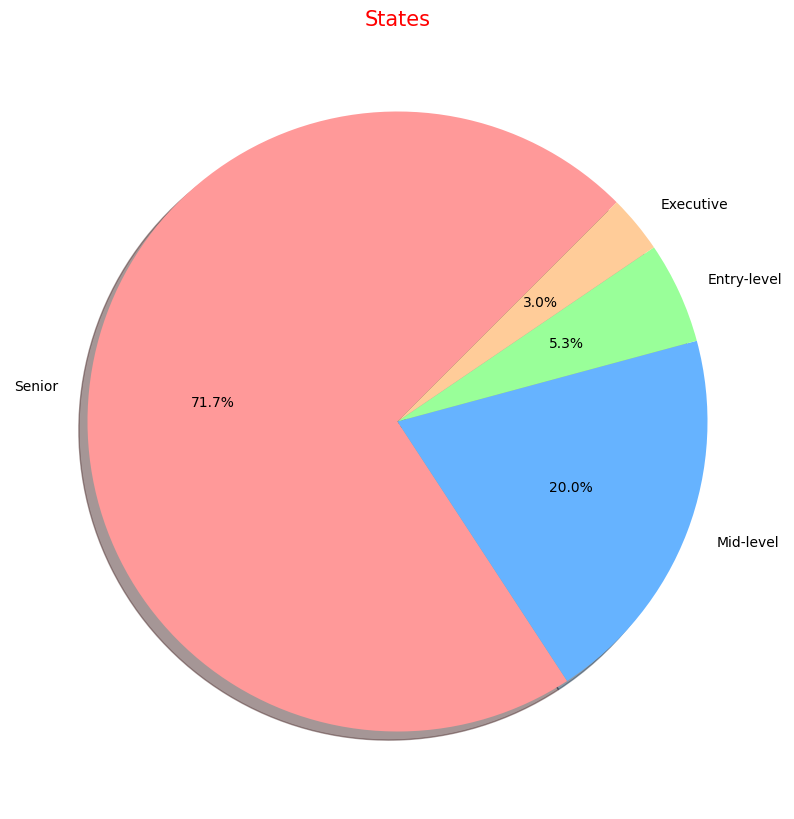

In [3]:
labels = df["experience_level"].value_counts().index
sizes = df["experience_level"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (10,16))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('States',color = 'red',fontsize = 15)
plt.show()                                              

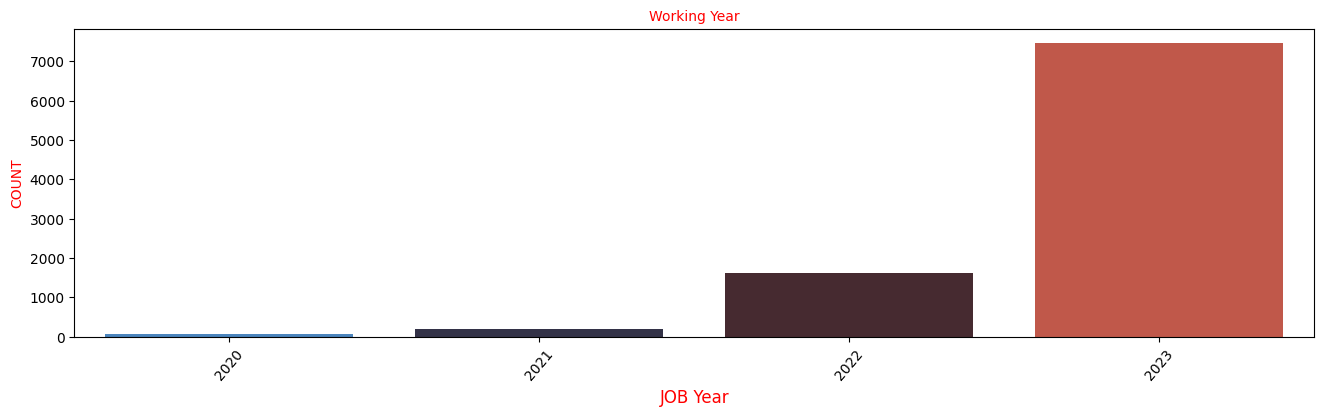

In [4]:
plt.figure(figsize=(16,4))
sns.countplot(data=df,x="work_year",palette="icefire")
plt.xticks(fontsize=10,rotation=50)
plt.xlabel("JOB Year",fontsize=12,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("Working Year",fontsize=10,color="RED")
plt.show()

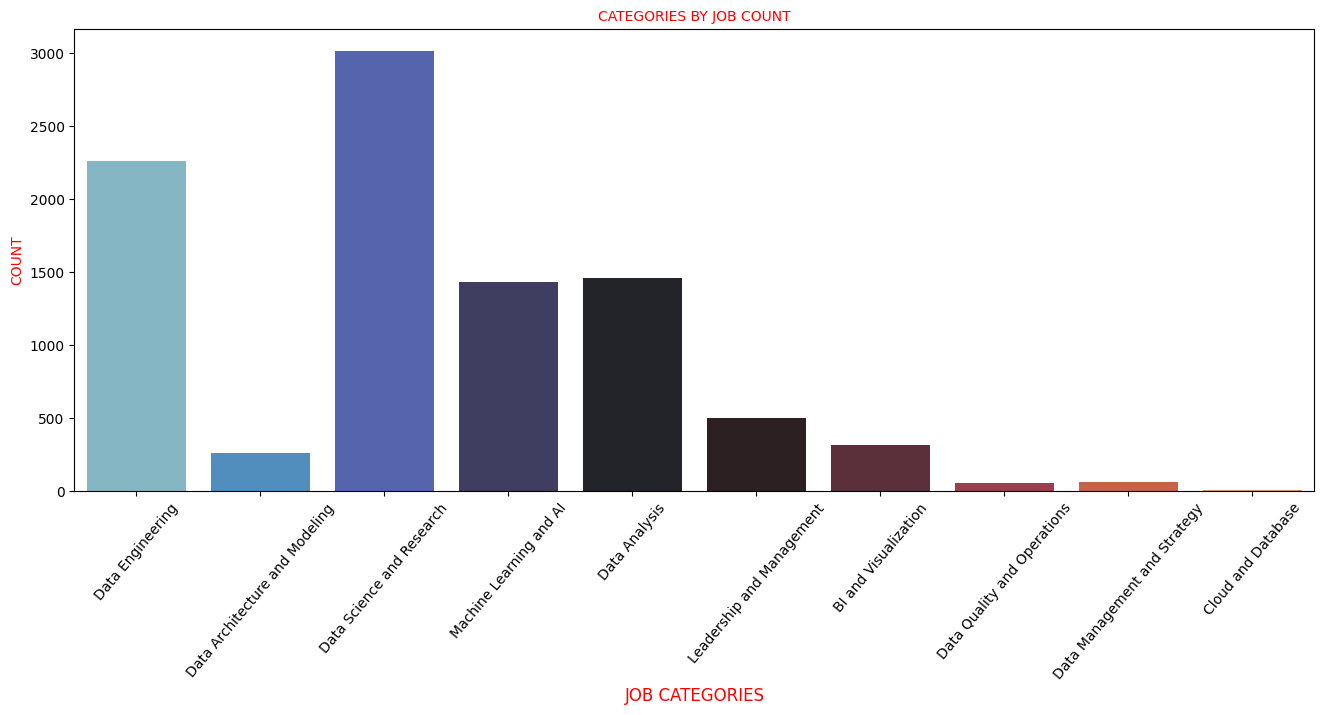

In [5]:
plt.figure(figsize=(16,6))
sns.countplot(data=df,x="job_category",palette="icefire")
plt.xticks(fontsize=10,rotation=50)
plt.xlabel("JOB CATEGORIES",fontsize=12,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("CATEGORIES BY JOB COUNT",fontsize=10,color="RED")
plt.show()

In [6]:
fig=px.bar(df.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'salary in usd'},template='ggplot2',text='salary_in_usd',title='<b> Top 10 Highest Paid Roles in Data Science')
fig.show()

In [7]:
z=df.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False)
z['salary_in_usd']=round(z['salary_in_usd'],2)
fig=px.bar(z.head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'avg salary in usd'},text='salary_in_usd',template='seaborn',title='<b> Top 10 Roles in Data Science based on Average Pay')
fig.update_traces(textfont_size=8)
fig.show()

In [8]:
px.funnel(df.groupby('company_location',as_index=False)['experience_level'].count().sort_values(by='experience_level',ascending=False).head(15),y='company_location',x='experience_level',color_discrete_sequence=['yellow'],labels={'experience_level':'count'},template='seaborn',title='<b> Top 15 Countries having maximum Data Science Jobs')

In [9]:
fig=px.pie(df.groupby('experience_level',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='experience_level',values='salary_in_usd',color='experience_level',hole=0.7,labels={'experience_level':'Experience level ','salary_in_usd':'count'},template='ggplot2',title='<b>Total Jobs Based on Experience Level')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

In [10]:
fig=px.pie(df.groupby('work_setting',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='work_setting',values='salary_in_usd',color='work_setting',hole=0.7,labels={'remote_ratio':'work_setting','salary_in_usd':'count'},template='plotly',title='<b> Remote Ratio')
fig.update_layout(title_x=0.5)

***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<div style="text-align: center;">
    <span style="font-size: 5em;">✔️</span>
</div>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       Let's make a goal of 50 Likes on This Notebook. Your support motivates me to regularly update and improve it. :-)
   </span>
</div>

<br>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.2em; font-weight: bold;font-family: Arial;">Muhammad Faisal Ali</span>
</div>